# Census Population Data (2020) + NYC Tree Census Data (2015)

### Tress per square mile (by Census Tract)

In [155]:
# load libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [156]:
# read in census population data by census tract

ct_pop = gpd.read_file("data/nyc_ct_pop.geojson")

In [157]:
ct_pop.shape

(2324, 5)

In [158]:
ct_pop.head()

,GEOID,NAME,variable,value,geometry
0,36005012701,"Census Tract 127.01, Bronx County, New York",P3_001N,1664.0,"POLYGON ((-73.89387 40.82651, -73.89293 40.826..."
1,36005037300,"Census Tract 373, Bronx County, New York",P3_001N,4365.0,"POLYGON ((-73.89242 40.84800, -73.89154 40.849..."
2,36005011900,"Census Tract 119, Bronx County, New York",P3_001N,4276.0,"POLYGON ((-73.89139 40.82494, -73.89059 40.825..."
3,36005039100,"Census Tract 391, Bronx County, New York",P3_001N,5255.0,"POLYGON ((-73.88845 40.85602, -73.88757 40.855..."
4,36005007900,"Census Tract 79, Bronx County, New York",P3_001N,4957.0,"POLYGON ((-73.90759 40.81660, -73.90630 40.817..."


In [4]:
# get count of unique census tracts
ct_pop['NAME'].value_counts()

Census Tract 127.01, Bronx County, New York     1
Census Tract 267, Kings County, New York        1
Census Tract 719, Queens County, New York       1
Census Tract 721, Queens County, New York       1
Census Tract 741, Queens County, New York       1
                                               ..
Census Tract 399, Kings County, New York        1
Census Tract 350, Kings County, New York        1
Census Tract 462.01, Kings County, New York     1
Census Tract 709, Queens County, New York       1
Census Tract 1176.01, Kings County, New York    1
Name: NAME, Length: 2324, dtype: int64

### Clean Census DF

In [160]:
# rename column
ct_pop.rename(columns={'value': 'population'}, inplace=True)

In [161]:
# remove column
del ct_pop['variable'] 

In [162]:
# clean up NAME column
ct_pop['NAME'] = ct_pop['NAME'].map(lambda x: x.lstrip('Census Tract').rstrip(' County, New York'))

In [163]:
# split NAME column
ct_pop_geo = ct_pop['NAME'].str.split(',', expand=True)

In [164]:
# rename new columns
ct_pop_geo.rename(columns={0: 'census tract', 1: 'county'}, inplace=True)

In [165]:
# join DFs on index
ct_pop_nyc = ct_pop.join(ct_pop_geo)

In [166]:
# remove column
del ct_pop_nyc['NAME'] 

In [167]:
ct_pop_nyc.head()

,GEOID,population,geometry,census tract,county
0,36005012701,1664.0,"POLYGON ((-73.89387 40.82651, -73.89293 40.826...",127.01,Bronx
1,36005037300,4365.0,"POLYGON ((-73.89242 40.84800, -73.89154 40.849...",373,Bronx
2,36005011900,4276.0,"POLYGON ((-73.89139 40.82494, -73.89059 40.825...",119,Bronx
3,36005039100,5255.0,"POLYGON ((-73.88845 40.85602, -73.88757 40.855...",391,Bronx
4,36005007900,4957.0,"POLYGON ((-73.90759 40.81660, -73.90630 40.817...",79,Bronx


In [169]:
ct_pop_nyc.shape

(2324, 5)

In [170]:
# check for crs
ct_pop_nyc.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [171]:
# re-set CRS
ct_pop_nyc = ct_pop_nyc.to_crs(6933)

In [172]:
# re-check for crs
ct_pop_nyc.crs 

<Derived Projected CRS: EPSG:6933>
Name: WGS 84 / NSIDC EASE-Grid 2.0 Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC EASE-Grid 2.0 Global
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

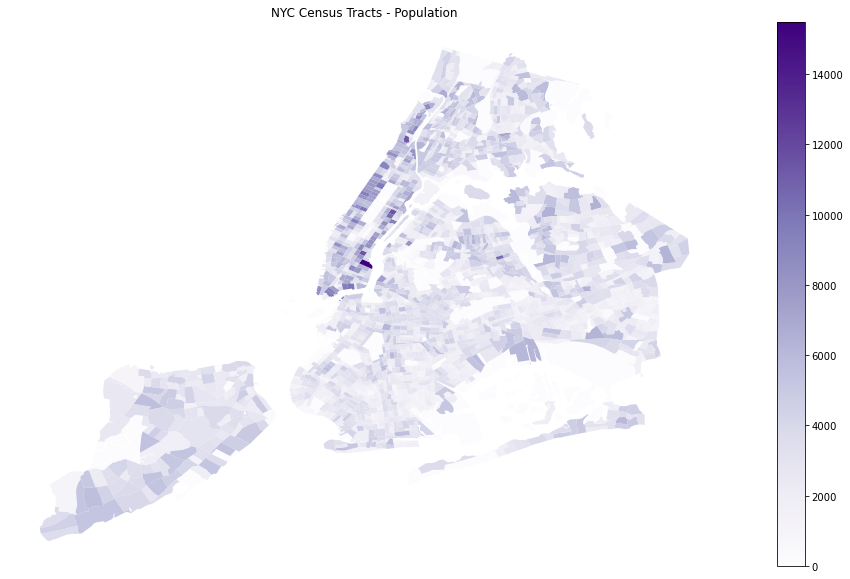

In [712]:
# initial plot - on population

ax = ct_pop_nyc.plot(column = 'population', cmap= "Purples", alpha = 1, linewidth = 0.5, figsize = (20,10), legend = True)
ax.axis('off')
ax.set(title = 'NYC Census Tracts - Population')

plt.savefig("maps/5Borough/Population.pdf")

In [174]:
# read in tree shapefile
trees_shape = gpd.read_file("data/2015StreetTreeCensus/geo_export_fb0b795e-20cf-488d-9d82-905967f34e5a.shp")

In [175]:
trees_shape.head()

,address,block_id,boro_ct,borocode,boroname,brnch_ligh,brnch_othe,brnch_shoe,cb_num,cncldist,...,tree_id,trnk_light,trnk_other,trnk_wire,user_type,x_sp,y_sp,zip_city,zipcode,geometry
0,108-005 70 AVENUE,348711.0,4073900,4,Queens,No,No,No,406,29.0,...,180683.0,No,No,No,TreesCount Staff,1.027431e+06,202756.768749,Forest Hills,11375,POINT (-73.84422 40.72309)
1,147-074 7 AVENUE,315986.0,4097300,4,Queens,No,No,No,407,19.0,...,200540.0,No,No,No,TreesCount Staff,1.034456e+06,228644.837379,Whitestone,11357,POINT (-73.81868 40.79411)
2,390 MORGAN AVENUE,218365.0,3044900,3,Brooklyn,No,No,No,301,34.0,...,204026.0,No,No,No,Volunteer,1.001823e+06,200716.891267,Brooklyn,11211,POINT (-73.93661 40.71758)
3,1027 GRAND STREET,217969.0,3044900,3,Brooklyn,No,No,No,301,34.0,...,204337.0,No,No,No,Volunteer,1.002420e+06,199244.253136,Brooklyn,11211,POINT (-73.93446 40.71354)
4,603 6 STREET,223043.0,3016500,3,Brooklyn,No,No,No,306,39.0,...,189565.0,No,No,No,Volunteer,9.909138e+05,182202.425999,Brooklyn,11215,POINT (-73.97598 40.66678)


In [176]:
trees_shape.shape

(683788, 42)

In [177]:
trees_shape.columns

Index(['address', 'block_id', 'boro_ct', 'borocode', 'boroname', 'brnch_ligh',
       'brnch_othe', 'brnch_shoe', 'cb_num', 'cncldist', 'created_at',
       'curb_loc', 'guards', 'health', 'latitude', 'longitude', 'nta',
       'nta_name', 'problems', 'root_grate', 'root_other', 'root_stone',
       'sidewalk', 'spc_common', 'spc_latin', 'st_assem', 'st_senate', 'state',
       'status', 'steward', 'stump_diam', 'tree_dbh', 'tree_id', 'trnk_light',
       'trnk_other', 'trnk_wire', 'user_type', 'x_sp', 'y_sp', 'zip_city',
       'zipcode', 'geometry'],
      dtype='object')

In [179]:
# get count of unique census tracts
trees_shape['boro_ct'].value_counts()

5020801    3776
5017600    3245
5020803    2749
5020804    2723
5019800    2620
           ... 
3025902       7
1011300       6
2031900       4
3028502       4
5001800       2
Name: boro_ct, Length: 2152, dtype: int64

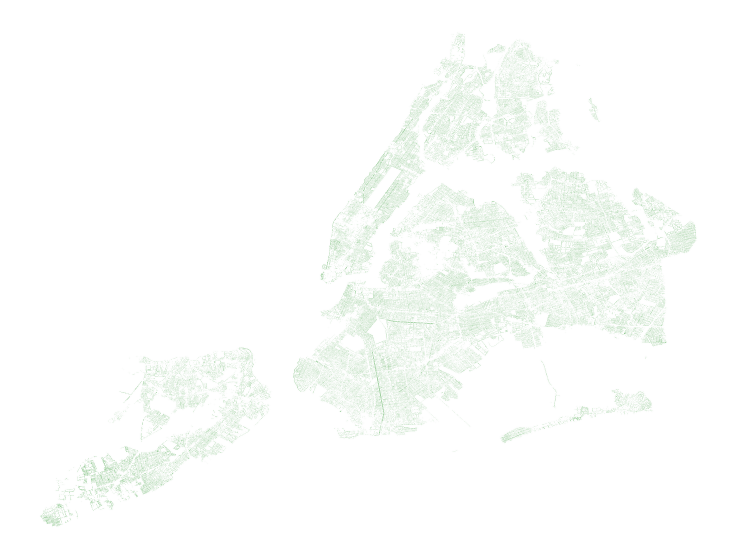

In [710]:
# initial plot
ax = trees_shape.plot(alpha = 0.01, markersize = 0.5, color = 'green', figsize = (20,10))
ax.axis('off')

plt.savefig("maps/5Borough/Trees.png")

In [181]:
# check CRS
trees_shape.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [182]:
# re-set CRS
trees_shape = trees_shape.to_crs(6933)

In [183]:
# recheck CRS
trees_shape.crs

<Derived Projected CRS: EPSG:6933>
Name: WGS 84 / NSIDC EASE-Grid 2.0 Global
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 86°S and 86°N.
- bounds: (-180.0, -86.0, 180.0, 86.0)
Coordinate Operation:
- name: US NSIDC EASE-Grid 2.0 Global
- method: Lambert Cylindrical Equal Area
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

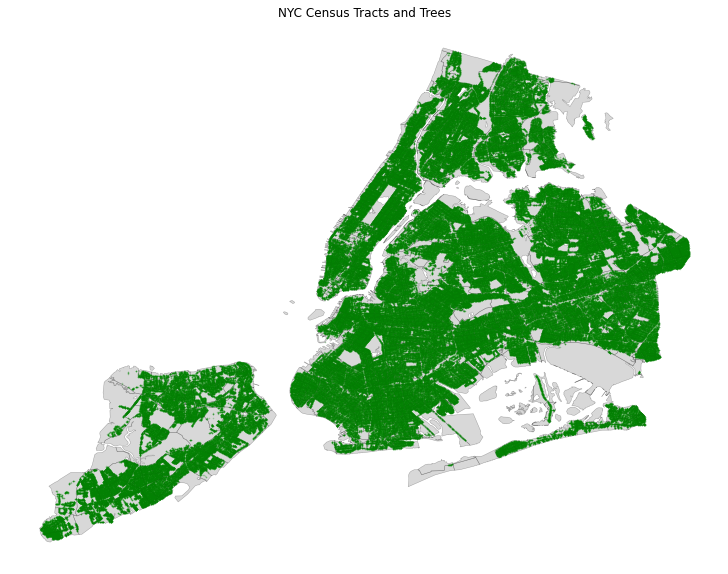

In [576]:
# plot pre-join, to confirm I am starting with all the data

# create a figure with one subplot
fig, ax = plt.subplots(figsize=(20,10))

# plot census tracts
ct_pop_nyc.plot(ax = ax, alpha = 0.3, edgecolor = 'black', linewidth = 0.5, color = 'gray')

# plot trees
trees_shape.plot(ax = ax, alpha = 0.2, markersize = 0.5, color = 'green')

ax.axis('off')
ax.set(title = 'NYC Census Tracts and Trees')

plt.savefig("maps/5Borough/Trees-CTs.pdf")

### Spatial Join: Left + Within (keep Trees on left)

In [188]:
# left join - keep trees on the left... to retain tree geometry and keep all trees

trees_tracts = gpd.sjoin(trees_shape, ct_pop_nyc[['GEOID', 'geometry']], how = 'left', op = 'within')
trees_tracts.head()

,address,block_id,boro_ct,borocode,boroname,brnch_ligh,brnch_othe,brnch_shoe,cb_num,cncldist,...,trnk_other,trnk_wire,user_type,x_sp,y_sp,zip_city,zipcode,geometry,index_right,GEOID
0,108-005 70 AVENUE,348711.0,4073900,4,Queens,No,No,No,406,29.0,...,No,No,TreesCount Staff,1.027431e+06,202756.768749,Forest Hills,11375,POINT (-7124953.645 4777769.938),1839.0,36081073900
1,147-074 7 AVENUE,315986.0,4097300,4,Queens,No,No,No,407,19.0,...,No,No,TreesCount Staff,1.034456e+06,228644.837379,Whitestone,11357,POINT (-7122489.794 4784672.008),1997.0,36081097300
2,390 MORGAN AVENUE,218365.0,3044900,3,Brooklyn,No,No,No,301,34.0,...,No,No,Volunteer,1.001823e+06,200716.891267,Brooklyn,11211,POINT (-7133868.252 4777234.037),835.0,36047044901
3,1027 GRAND STREET,217969.0,3044900,3,Brooklyn,No,No,No,301,34.0,...,No,No,Volunteer,1.002420e+06,199244.253136,Brooklyn,11211,POINT (-7133660.657 4776840.838),1721.0,36047044902
4,603 6 STREET,223043.0,3016500,3,Brooklyn,No,No,No,306,39.0,...,No,No,Volunteer,9.909138e+05,182202.425999,Brooklyn,11215,POINT (-7137667.079 4772291.824),2236.0,36047016500


In [189]:
trees_tracts.shape

(683788, 44)

### Count Number of Trees per Census Tract

In [824]:
# create a new DF - count the number of trees by counting on GEOID
trees_per_tract = pd.DataFrame(trees_tracts['GEOID'].value_counts())

In [274]:
# rename column
trees_per_tract.columns = ['tree_count']

In [275]:
trees_per_tract.head(2)

,tree_count
36085017600,3242
36085020803,2774


In [276]:
# set GEOID as a proper column, not index, so we can merge in it
trees_per_tract['GEOID'] = list(trees_per_tract.index)

In [277]:
trees_per_tract = trees_per_tract.reset_index(drop = True)

In [278]:
trees_per_tract.head()

,tree_count,GEOID
0,3242,36085017600
1,2774,36085020803
2,2729,36085020804
3,2556,36085019800
4,2393,36085017005


### Merge Census Tracts (with Polygons) with Tree Counts (this is only info we need from trees)

In [ ]:
# keep census data on left as to retain polygon geometry
trees_cts = pd.merge(ct_pop_nyc, trees_per_tract, how = 'left', on = 'GEOID')

In [280]:
# create column to get trees per capita
trees_cts['trees_per_capita'] = trees_cts['tree_count'] / trees_cts['population']

In [281]:
# get area per square mile for each census tract, in order to calculate on
# have to convert to miles, as CRS is in meters
trees_cts['area_per_sqmile'] = trees_cts['geometry'].area / 2.59e+6

In [282]:
# create column to get trees per square mile
trees_cts['trees_per_sqmile'] = trees_cts['tree_count'] / trees_cts['area_per_sqmile']

In [283]:
trees_cts.head()

,GEOID,population,geometry,census tract,county,tree_count,trees_per_capita,area_per_sqmile,trees_per_sqmile
0,36005012701,1664.0,"POLYGON ((-7129744.449 4787818.802, -7129654.2...",127.01,Bronx,201.0,0.120793,0.041620,4829.377806
1,36005037300,4365.0,"POLYGON ((-7129604.833 4789904.712, -7129520.2...",373,Bronx,211.0,0.048339,0.066843,3156.671549
2,36005011900,4276.0,"POLYGON ((-7129505.357 4787665.982, -7129427.7...",119,Bronx,247.0,0.057764,0.063114,3913.558552
3,36005039100,5255.0,"POLYGON ((-7129221.590 4790683.165, -7129136.5...",391,Bronx,364.0,0.069267,0.079709,4566.636743
4,36005007900,4957.0,"POLYGON ((-7131068.335 4786855.710, -7130944.4...",79,Bronx,297.0,0.059915,0.076384,3888.228621


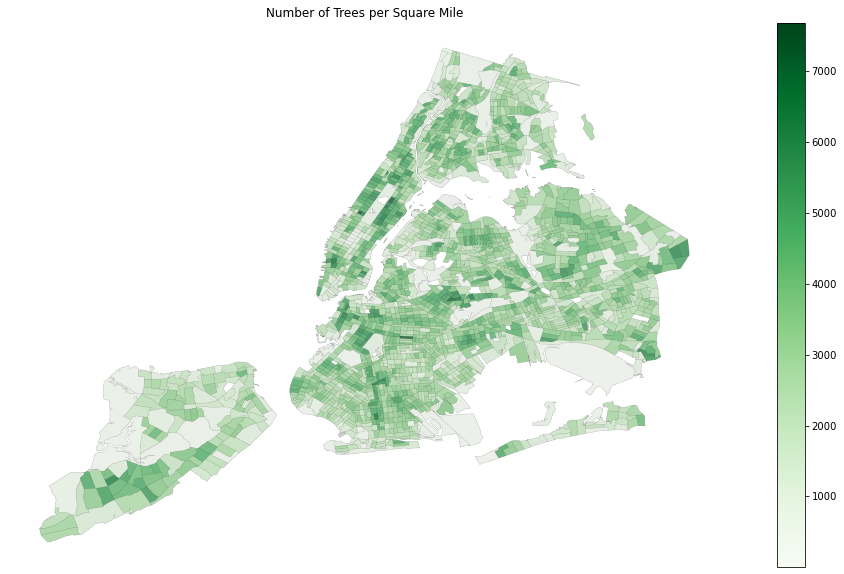

In [718]:
# initial plot to ensure we have all data - plot tree count

# create a figure with one subplot
fig, ax = plt.subplots(figsize=(20,10))

# plot census tracts
trees_cts.plot(ax = ax, alpha = 0.3, edgecolor = 'black', linewidth = 0.5, color = 'gray')

# plot tree pop
ax = trees_cts.plot(ax = ax, column = 'trees_per_sqmile', cmap= "Greens", alpha = 0.7, linewidth = 0.5, legend = True)

ax.axis('off')
ax.set(title = 'Number of Trees per Square Mile')

plt.savefig("maps/5Borough/Trees-per-Square-Mile.pdf")

# Spatial Autocorrelation - Local Moran's I

### Trees per square mile - *discount census tracts with 0 trees per capita*

In [719]:
from pysal.lib import weights

In [720]:
# first - drop cells containing Null values (cells containing zero points) - or code will not work
trees_cts = trees_cts.dropna(subset = ['trees_per_sqmile'])

In [721]:
# re-check for NaN values
trees_cts['trees_per_sqmile'].isnull().values.any()

False

In [722]:
# check min value
trees_cts['trees_per_sqmile'].min()

5.669894022446699

In [723]:
# check max value
trees_cts['trees_per_sqmile'].max()

7681.879289752842

In [726]:
# drop trees per capita with 0

trees_cts = trees_cts.query("trees_per_sqmile > 0")

In [727]:
# create queen contiguity weights
w = weights.Queen.from_dataframe(trees_cts)

In [728]:
# fill in islands with KNN weights
w_knn = weights.KNN.from_dataframe(trees_cts, k=1)

In [729]:
w = weights.attach_islands(w, w_knn)

In [730]:
# row standardize weights
w.transform = 'R'

### Local Moran's I (spatial autocorrelation)

In [731]:
# on trees per capita - only remove 0
local_moran = esda.moran.Moran_Local(trees_cts['trees_per_sqmile'], w)

In [732]:
from splot.esda import plot_local_autocorrelation

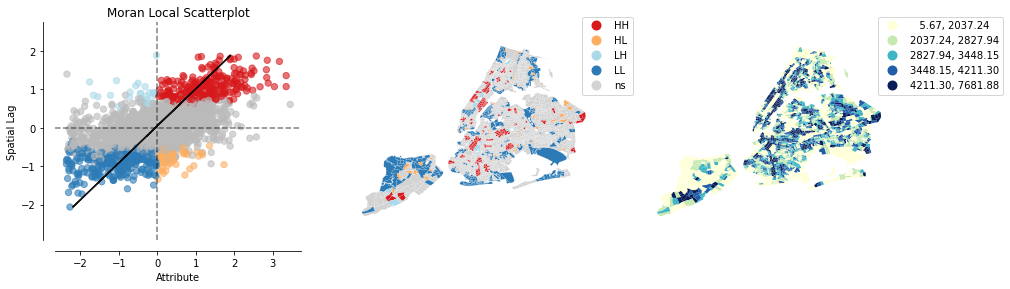

In [733]:
# plot results (at p < 0.05)

plot_local_autocorrelation(local_moran, trees_cts,'trees_per_sqmile', p = 0.05 );

plt.savefig("maps/5Borough/Trees-per-SquareMile_morans.pdf")

In [734]:
# get clusters and outliers
trees_cts['local_moran_Is'] = local_moran.Is

In [735]:
trees_cts['local_moran_p_value'] = local_moran.p_sim

In [736]:
trees_cts['local_moran_quadrant'] = local_moran.q

In [737]:
# get statisically significant clusters and outliers
alpha = 0.05
hotspots = trees_cts.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 1")
coldspots = trees_cts.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 3")
doughnuts = trees_cts.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 2")
diamonds = trees_cts.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 4")

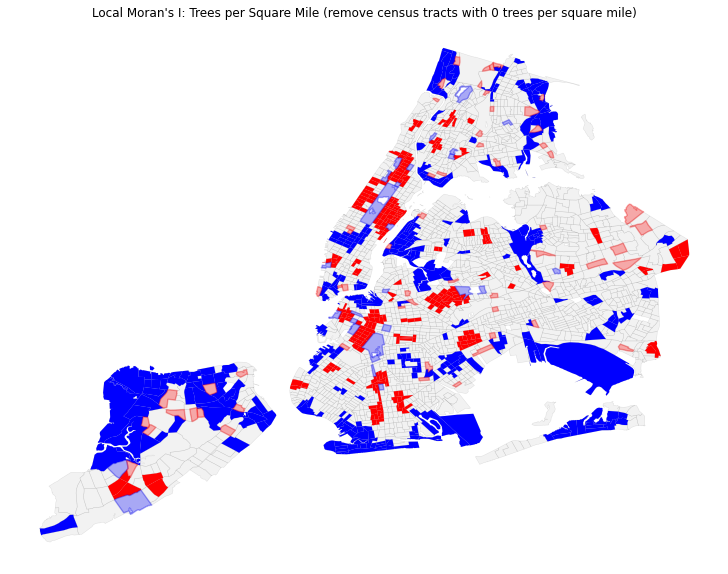

In [738]:
# view clusters and outliers

# create a figure with one subplot
fig, ax = plt.subplots(figsize=(20,10))

# plot census tracts
trees_cts.plot(ax = ax, alpha = 0.1, edgecolor = 'black', linewidth = 0.5, color = 'gray')

# plot HH / LL / HL / LH
trees_cts.plot(ax = ax, facecolor = 'none', alpha = 0)
hotspots.plot(color = 'red', ax = ax, label = 'Hot Spot')
coldspots.plot(color = 'blue', ax = ax, label = 'Cold Spot')
doughnuts.plot(color = 'blue', alpha = 0.3, edgecolor = 'blue', linewidth = 1.5, ax = ax, label = 'Doughnuts')
diamonds.plot(color = 'red', alpha = 0.3, edgecolor = 'red', linewidth = 1.5, ax = ax, label = 'Diamonds')

ax.axis('off')
ax.set(title = "Local Moran's I: Trees per Square Mile (remove census tracts with 0 trees per square mile)")

plt.savefig("maps/5Borough/Trees-per-SQM-no_limits.pdf")

### where to cut off low / high values

In [771]:
# look at largest values
trees_cts['trees_per_sqmile'].nlargest(n=10)

160     7681.879290
382     7541.947705
1852    7541.158313
626     7310.811922
1196    7139.380149
1814    6927.917597
514     6894.213369
792     6874.007411
1597    6863.395312
1139    6647.135891
Name: trees_per_sqmile, dtype: float64

In [773]:
# look at smallest values
trees_cts['trees_per_sqmile'].nsmallest(n=10)

917      5.669894
754      6.269298
967     23.056478
1195    27.813898
1668    46.734374
1423    52.941923
1209    72.168766
1136    74.180313
691     76.421477
1090    76.513939
Name: trees_per_sqmile, dtype: float64

In [741]:
# lowest 1% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.01))

177.2416621616044


In [742]:
# lowest 5% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.05))

746.6208148450106


In [743]:
# lowest 10% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.1))

1388.2241635549346


In [744]:
# lowest 20% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.2))

2037.23942097283


In [745]:
# highest 1% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.99))

6232.176690754


In [746]:
# highest 5% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.95))

5239.4892898753915


In [747]:
# highest 10% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.90))

4830.3636204928935


In [748]:
# highest 20% of data
print(trees_cts['trees_per_sqmile'].quantile(q = 0.80))

4211.295482232421


# Spatial Autocorrelation - Local Moran's I

### Trees per square mile - *discount census tracts with less that 100 and more than 6,000 trees per square mile*

In [754]:
# keep trees per capita: more that 0.01 and less than 75

trees_cts_limit = trees_cts
trees_cts_limit = trees_cts_limit.query("trees_per_sqmile > 100 & trees_per_sqmile < 6000")

In [755]:
# create queen contiguity weights
w1 = weights.Queen.from_dataframe(trees_cts_limit)

In [756]:
# fill in islands with KNN weights
w_knn1 = weights.KNN.from_dataframe(trees_cts_limit, k=1)

In [757]:
w1 = weights.attach_islands(w1, w_knn1)

In [758]:
# row standardize weights
w1.transform = 'R'

### Local Moran's I (spatial autocorrelation) - limited range

In [759]:
# on trees per capita - with limits
local_moran_limit = esda.moran.Moran_Local(trees_cts_limit['trees_per_sqmile'], w1)

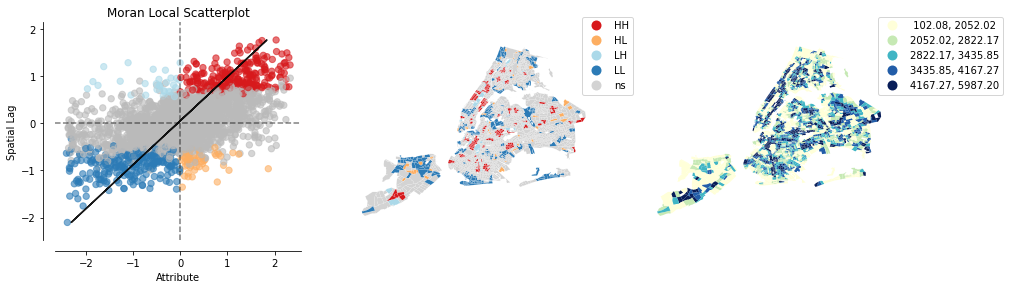

In [809]:
# plot results (at p < 0.05)
plot_local_autocorrelation(local_moran_limit, trees_cts_limit,'trees_per_sqmile', p = 0.05 );

plt.savefig("maps/5Borough/Trees-per-SQM-limits-moran.pdf")

In [761]:
# get clusters and outliers
trees_cts_limit['local_moran_Is'] = local_moran_limit.Is

In [762]:
trees_cts_limit['local_moran_p_value'] = local_moran_limit.p_sim

In [763]:
trees_cts_limit['local_moran_quadrant'] = local_moran_limit.q

In [764]:
# get statisically significant clusters and outliers
alpha = 0.05
hotspots_lm = trees_cts_limit.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 1")
coldspots_lm = trees_cts_limit.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 3")
doughnuts_lm = trees_cts_limit.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 2")
diamonds_lm = trees_cts_limit.query(f"local_moran_p_value < {alpha} & local_moran_quadrant == 4")

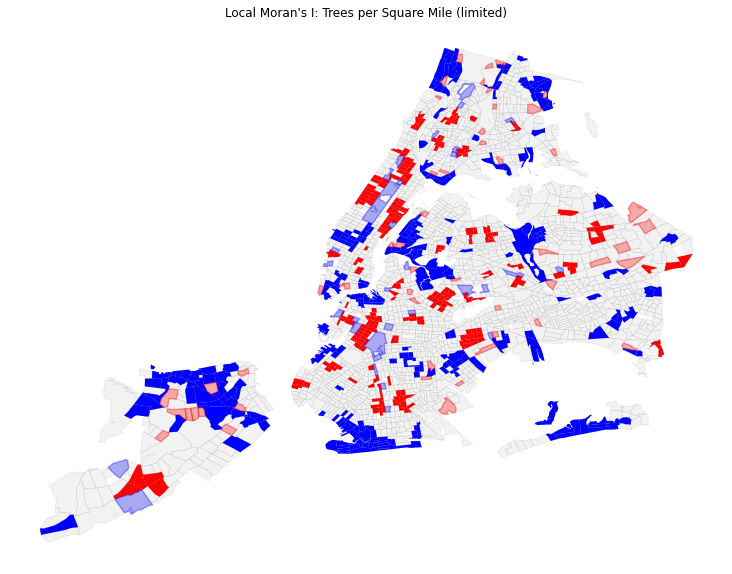

In [765]:
# view clusters and outliers

# create a figure with one subplot
fig, ax = plt.subplots(figsize=(20,10))

# plot census tracts
trees_cts_limit.plot(ax = ax, alpha = 0.1, edgecolor = 'black', linewidth = 0.5, color = 'gray')

# plot HH / LL / HL / LH
trees_cts_limit.plot(ax = ax, facecolor = 'none', alpha = 0)
hotspots_lm.plot(color = 'red', ax = ax, label = 'Hot Spot')
coldspots_lm.plot(color = 'blue', ax = ax, label = 'Cold Spot')
doughnuts_lm.plot(color = 'blue', alpha = 0.3, edgecolor = 'blue', linewidth = 1.5, ax = ax, label = 'Doughnuts')
diamonds_lm.plot(color = 'red', alpha = 0.3, edgecolor = 'red', linewidth = 1.5, ax = ax, label = 'Diamonds')

ax.axis('off')
ax.set(title = "Local Moran's I: Trees per Square Mile (limited)")

plt.savefig("maps/5Borough/Trees-per-SQM-limits.pdf")